<a href="https://colab.research.google.com/github/PrudhviNarayanKorupolu/5731assignment4_korupolu/blob/main/INFO5731_Assignment_Four_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here
import pandas as pd
my_data=pd.read_csv('Reviews.csv')
print(my_data.shape)




(2804, 1)


In [ ]:
my_data.head()

,0
0,"b""SoftBank's $100 Billion Tech Fund Rankles VC..."
1,b'Quora tests video answers to steal Q&A from ...
2,b'Pittsburgh Welcomed Uber s Driverless Car Ex...
3,b'LeEco employees are being called to a Tuesda...
4,b'Why Did a Chinese Peroxide Company Pay $1 Bi...


Cleaning and Transformation

In [ ]:
import nltk   
my_data['Text'] = my_data['Text'].str.replace('[^\w\s]','')  #removal of punctuation
my_data['Text'] = my_data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
my_data['Text'] = my_data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(my_data['Text']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [ ]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [ ]:
print(model.print_topics(num_topics = 10, num_words = 5))

[(0, '0.028*"percent" + 0.017*"billion" + 0.016*"revenue" + 0.013*"year" + 0.013*"company"'), (1, '0.023*"company" + 0.013*"billion" + 0.010*"million" + 0.010*"investors" + 0.009*"said"'), (2, '0.012*"music" + 0.011*"service" + 0.011*"video" + 0.008*"streaming" + 0.006*"content"'), (3, '0.014*"uber" + 0.010*"car" + 0.009*"cars" + 0.009*"drivers" + 0.009*"said"'), (4, '0.016*"data" + 0.016*"facebook" + 0.008*"said" + 0.006*"companies" + 0.006*"people"'), (5, '0.020*"google" + 0.015*"amazon" + 0.008*"mobile" + 0.008*"search" + 0.006*"new"'), (6, '0.013*"million" + 0.011*"india" + 0.010*"company" + 0.010*"alibaba" + 0.010*"said"'), (7, '0.009*"apple" + 0.008*"pay" + 0.007*"new" + 0.006*"said" + 0.005*"credit"'), (8, '0.021*"facebook" + 0.020*"users" + 0.017*"app" + 0.013*"twitter" + 0.008*"new"'), (9, '0.008*"company" + 0.007*"said" + 0.006*"loans" + 0.006*"companies" + 0.005*"mr"')]


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
import pandas as pd
my_data= pd.read_csv('Reviews_segmentation.csv')
print(my_data.shape)





(500, 4)


In [ ]:
my_data.head()

,id,Description,Sentiment,Unnamed: 3
0,0,Purchased this product advertised as fully unl...,Negative,NaN
1,1,I was feeling a bit skeptical after I placed m...,Positive,NaN
2,2,Phone was not unlocked could it use it,Negative,NaN
3,3,The screen came cracked and popped out of the ...,Negative,NaN
4,4,Be careful mine had a scratch on screen very s...,Negative,NaN


In [ ]:
my_data['Sentiment'].value_counts()

Positive                                                                                                                                             319
Negative                                                                                                                                             144
Neutral                                                                                                                                               36
t dilike the product i dislike the fact that this was taken out my account and no one notifed me that this large amount was coming out my account      1
Name: Sentiment, dtype: int64

In [ ]:
import nltk
my_data['Sentiment'] = my_data['Sentiment'].str.replace('[^\w\s]','')  #removal of punctuation
my_data['Sentiment'] = my_data['Sentiment'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
my_data['Sentiment'] = my_data['Sentiment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
my_data.head()

,id,Description,Sentiment,Unnamed: 3
0,0,Purchased this product advertised as fully unl...,negative,NaN
1,1,I was feeling a bit skeptical after I placed m...,positive,NaN
2,2,Phone was not unlocked could it use it,negative,NaN
3,3,The screen came cracked and popped out of the ...,negative,NaN
4,4,Be careful mine had a scratch on screen very s...,negative,NaN


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   Description  500 non-null    object
 2   Sentiment    500 non-null    object
 3   Unnamed: 3   1 non-null      object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf.fit(my_data['Description'])
x_values =  tf_idf.transform(my_data['Description'])
y_values = my_data['Sentiment']


# Split the training data to training and validating data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

In [ ]:
from sklearn import metrics

def evaluation(y_pred, y_test):
    Accuracy = metrics.accuracy_score(y_pred, y_test)
    Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
    print("Accuracy: ", Accuracy.round(2))
    print("Recall:", Recall.round(2))
    print("Precision:", Precision.round(2))
    print("F-1 score:", F1.round(2))

In [ ]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

naive_bayes_implement = naive_bayes.MultinomialNB()

naive_bayes_implement.fit(x_train,y_train)

y_pred_valid = naive_bayes_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)


Accuracy:  0.82
Recall: 0.82
Precision: 0.82
F-1 score: 0.82


In [ ]:
from sklearn import svm

svm_implement = svm.SVC()

svm_implement.fit(x_train,y_train)

y_pred_valid = svm_implement.predict(x_valid)
evaluation(y_pred_valid, y_valid)


Accuracy:  0.84
Recall: 0.84
Precision: 0.84
F-1 score: 0.84


Naive bayes has got a better perfomance than SVM by 2 percent

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv("train.csv")

In [ ]:

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


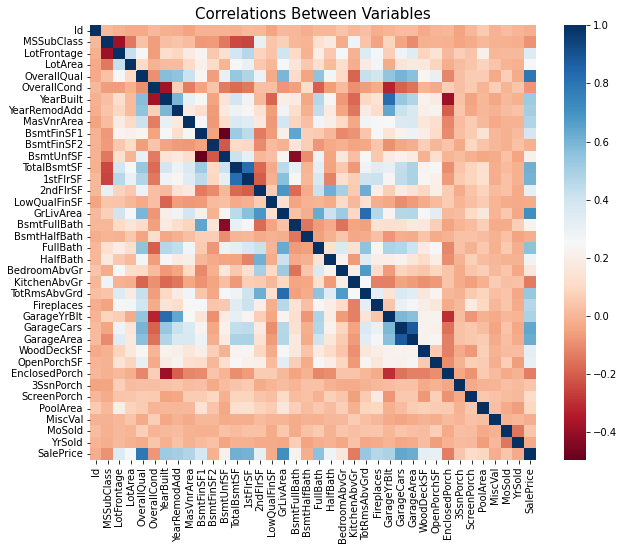

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
------------------------------
TOTAL MISSING VALUES: 6965


Modeling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



Feature selection

In [ ]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [ ]:
#Splitting the data into X and y chunks

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

Encoding the categorical features in X dataset by using One-Hot Encoding method


In [ ]:

X = pd.get_dummies(X, columns=cat_cols)

Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
important_num_cols.remove("SalePrice")
scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

Defining the functions for evaluating the model

In [ ]:

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

Machine Learning Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 23572.530245287526
MSE: 1400430004.3494325
RMSE: 37422.31960140141
R2 Score: 0.809801813004608
------------------------------
RMSE Cross-Validation: 35933.128976293614
